## Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten
df = pd.read_csv("/content/Diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [ ]:
title_mapping = {'YES':1,'NO':0}
df[' Class variable']=df[' Class variable'].map(title_mapping)

## Plotting Zeros Count in Data

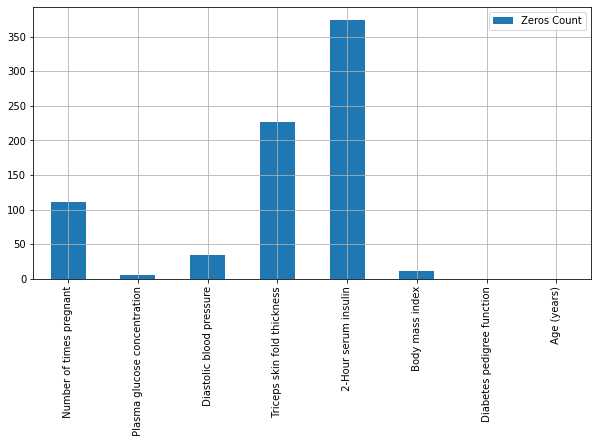

In [ ]:
z=(df == 0).sum(axis=0)
z=pd.DataFrame(z)
z.columns=['Zeros Count']
z.drop(' Class variable',inplace=True)
z.plot(kind='bar',stacked=True, figsize=(10,5),grid=True)

In [ ]:
col=['n_pregnant','glucose_conc','bp','skin_len','insulin','bmi','pedigree_fun','age','Output']
df.columns=col
df.head()

,n_pregnant,glucose_conc,bp,skin_len,insulin,bmi,pedigree_fun,age,Output
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_true_count = len(df.loc[df['Output'] == True])
diabetes_false_count = len(df.loc[df['Output'] == False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

## Replacing 0 with NaN to Handle Easily

In [ ]:
col=['glucose_conc','bp','insulin','bmi','skin_len']
for i in col:
    df[i].replace(0, np.nan, inplace= True)

In [ ]:
df.isnull().sum()

n_pregnant        0
glucose_conc      5
bp               35
skin_len        227
insulin         374
bmi              11
pedigree_fun      0
age               0
Output            0
dtype: int64

### Function to calculate Median according to the Output

In [ ]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Output']].groupby(['Output'])[[var]].median().reset_index()
    return temp

In [ ]:
median_target('insulin')

,Output,insulin
0,0,102.5
1,1,169.5


In [ ]:
median_target('glucose_conc')

,Output,glucose_conc
0,0,107.0
1,1,140.0


In [ ]:
median_target('skin_len')

,Output,skin_len
0,0,27.0
1,1,32.0


In [ ]:
median_target('bp')

,Output,bp
0,0,70.0
1,1,74.5


In [ ]:
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


## Filling the NaN value with Median according to Output

In [ ]:
df.loc[(df['Output'] == 0 ) & (df['insulin'].isnull()), 'insulin'] = 102.5
df.loc[(df['Output'] == 1 ) & (df['insulin'].isnull()), 'insulin'] = 169.5
df.loc[(df['Output'] == 0 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 107
df.loc[(df['Output'] == 1 ) & (df['glucose_conc'].isnull()), 'glucose_conc'] = 140
df.loc[(df['Output'] == 0 ) & (df['skin_len'].isnull()), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len'].isnull()), 'skin_len'] = 32
df.loc[(df['Output'] == 0 ) & (df['bp'].isnull()), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp'].isnull()), 'bp'] = 74.5
df.loc[(df['Output'] == 0 ) & (df['bmi'].isnull()), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi'].isnull()), 'bmi'] = 34.3

In [ ]:
df.isnull().sum()

n_pregnant      0
glucose_conc    0
bp              0
skin_len        0
insulin         0
bmi             0
pedigree_fun    0
age             0
Output          0
dtype: int64

## Box Plot to check for Outliers in the Data

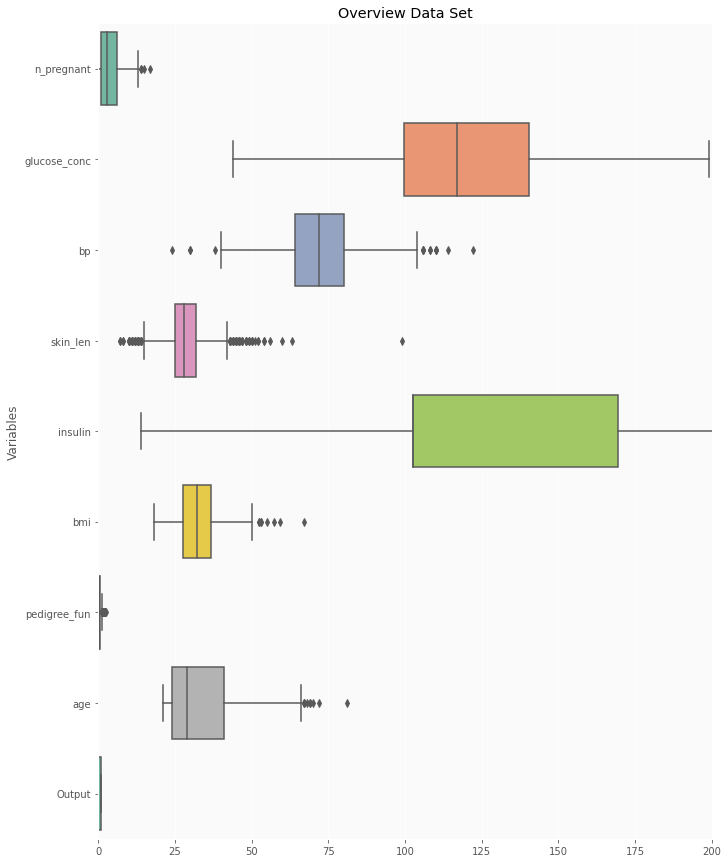

In [ ]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

# Outlier Correction with Median

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


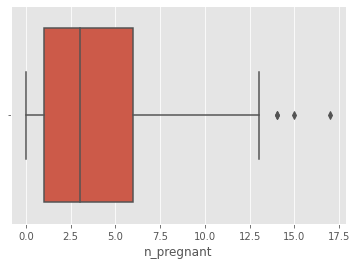

In [ ]:
sns.boxplot(df.n_pregnant)

In [ ]:
df['n_pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: n_pregnant, dtype: int64

In [ ]:
median_target('n_pregnant')

,Output,n_pregnant
0,0,2.0
1,1,4.0


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['n_pregnant']>13), 'n_pregnant'] = 2
df.loc[(df['Output'] == 1 ) & (df['n_pregnant']>13), 'n_pregnant'] = 4

In [ ]:
df['n_pregnant'].value_counts()

1     135
0     111
2     103
3      75
4      72
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
Name: n_pregnant, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


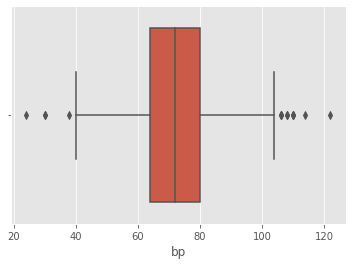

In [ ]:
sns.boxplot(df.bp)

In [ ]:
median_target('bp')

,Output,bp
0,0,70.0
1,1,74.5


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['bp']<40), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']<40), 'bp'] = 74.5

In [ ]:
df.loc[(df['Output'] == 0 ) & (df['bp']>103), 'bp'] = 70
df.loc[(df['Output'] == 1 ) & (df['bp']>103), 'bp'] = 74.5

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


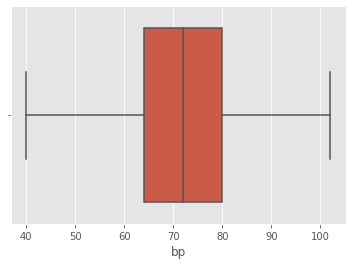

In [ ]:
sns.boxplot(df.bp)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


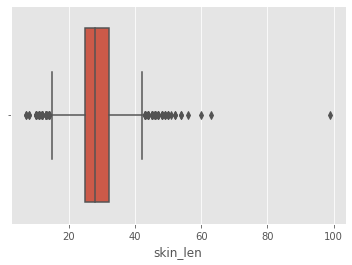

In [ ]:
sns.boxplot(df.skin_len)

In [ ]:
median_target('skin_len')

,Output,skin_len
0,0,27.0
1,1,32.0


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['skin_len']>38), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']>38), 'skin_len'] = 32

In [ ]:
df.loc[(df['Output'] == 0 ) & (df['skin_len']<20), 'skin_len'] = 27
df.loc[(df['Output'] == 1 ) & (df['skin_len']<20), 'skin_len'] = 32

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


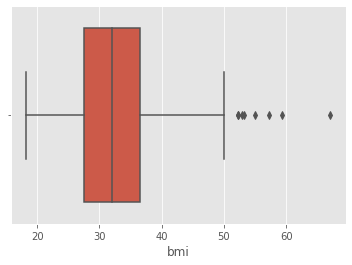

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
median_target('bmi')

,Output,bmi
0,0,30.1
1,1,34.3


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['bmi']>48), 'bmi'] = 30.1
df.loc[(df['Output'] == 1 ) & (df['bmi']>48), 'bmi'] = 34.3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


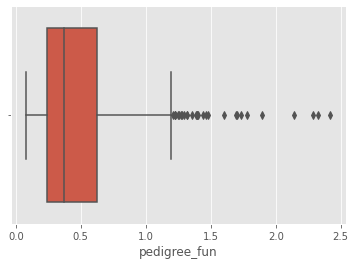

In [ ]:
sns.boxplot(df.pedigree_fun)

In [ ]:
median_target('pedigree_fun')

,Output,pedigree_fun
0,0,0.336
1,1,0.449


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.336
df.loc[(df['Output'] == 1 ) & (df['pedigree_fun']>1), 'pedigree_fun'] = 0.449

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


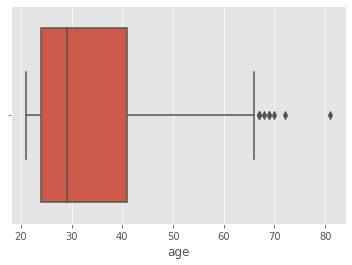

In [ ]:
sns.boxplot(df.age)

In [ ]:
median_target('age')

,Output,age
0,0,27.0
1,1,36.0


In [ ]:
df.loc[(df['Output'] == 0 ) & (df['age']>61), 'age'] = 27
df.loc[(df['Output'] == 1 ) & (df['age']>61), 'age'] = 36

## Splitting the Data

In [ ]:
X = df.drop(['Output'], 1)
y = df['Output']

<ipython-input-40-f05757b13d74>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['Output'], 1)


In [ ]:
print(X)

     n_pregnant  glucose_conc    bp  skin_len  insulin   bmi  pedigree_fun  \
0             6         148.0  72.0      35.0    169.5  33.6         0.627   
1             1          85.0  66.0      29.0    102.5  26.6         0.351   
2             8         183.0  64.0      32.0    169.5  23.3         0.672   
3             1          89.0  66.0      23.0     94.0  28.1         0.167   
4             0         137.0  40.0      35.0    168.0  43.1         0.449   
..          ...           ...   ...       ...      ...   ...           ...   
763          10         101.0  76.0      27.0    180.0  32.9         0.171   
764           2         122.0  70.0      27.0    102.5  36.8         0.340   
765           5         121.0  72.0      23.0    112.0  26.2         0.245   
766           1         126.0  60.0      32.0    169.5  30.1         0.349   
767           1          93.0  70.0      31.0    102.5  30.4         0.315   

     age  
0     50  
1     31  
2     32  
3     21  
4     33

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)

In [ ]:
print(x_train)

     n_pregnant  glucose_conc    bp  skin_len  insulin   bmi  pedigree_fun  \
448           0         104.0  64.0      37.0     64.0  33.6         0.510   
647           0         179.0  50.0      36.0    159.0  37.8         0.455   
365           5          99.0  54.0      28.0     83.0  34.0         0.499   
752           3         108.0  62.0      24.0    102.5  26.0         0.223   
446           1         100.0  72.0      27.0     70.0  25.3         0.658   
..          ...           ...   ...       ...      ...   ...           ...   
420           1         119.0  88.0      27.0    170.0  45.3         0.507   
118           4          97.0  60.0      23.0    102.5  28.2         0.443   
531           0         107.0  76.0      27.0    102.5  45.3         0.686   
297           0         126.0  84.0      29.0    215.0  30.7         0.520   
406           4         115.0  72.0      32.0    169.5  28.9         0.376   

     age  
448   22  
647   22  
365   30  
752   25  
446   28

## Scaling the Data

In [ ]:
#@title
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
print(x_train)

[[-1.16220045 -0.57401888 -0.73755903 ...  0.26633936  0.47167148
  -0.99018404]
 [-1.16220045  1.91712894 -2.0200628  ...  0.94003818  0.21512267
  -0.99018404]
 [ 0.35866715 -0.7400954  -1.65363315 ...  0.33050115  0.42036172
  -0.19388672]
 ...
 [-1.16220045 -0.47437297  0.36172992 ...  2.14307178  1.29262766
  -0.79110971]
 [-1.16220045  0.15671781  1.09458922 ... -0.19883363  0.51831671
  -0.79110971]
 [ 0.05449363 -0.20865054 -0.00469973 ... -0.4875617  -0.15337471
   1.39870791]]


## SVM With RBF Kernel

In [ ]:
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8311688311688312

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


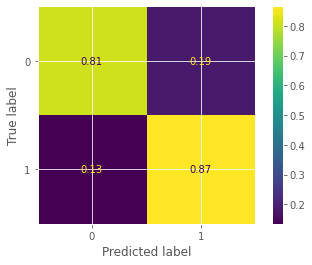

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

plot_confusion_matrix(model, x_test, y_test, normalize='true')

In [ ]:
#@title
confusion_matrix(y_test,y_pred)

array([[89, 11],
       [ 5, 49]])

In [ ]:
#@title
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       100
           1       0.82      0.91      0.86        54

    accuracy                           0.90       154
   macro avg       0.88      0.90      0.89       154
weighted avg       0.90      0.90      0.90       154



AUC: 0.90


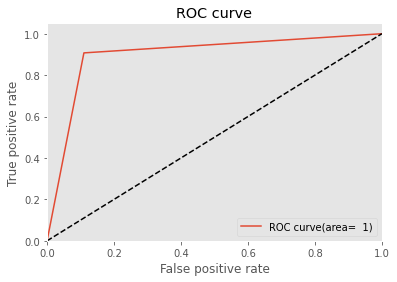

In [ ]:
#@title
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**SVM OPTIMIZATION BY CSA**

ACCURACY: 93.5%

SEED = 12



In [ ]:
#@title
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import math

def crow_search_algorithm(X, y, max_iterations, population_size, a, b,seed):
    np.random.seed(seed)
    # Initialize the population of solutions
    solutions = []
    for i in range(population_size):
        solutions.append(np.random.uniform(-2, 2, size=X.shape[1]))
    
    # Iterate over the maximum number of iterations
    for i in range(max_iterations):
        # Calculate the fitness of each solution
        fitness = []
        for solution in solutions:
            model = svm.SVC(kernel='rbf', class_weight={0: solution[0], 1: solution[1]})
            model.fit(X, y)
            accuracy = model.score(X, y)
            test = model.score(x_test, y_test)
            print(f"iter: {i} accuracy: {accuracy}, test: {test}")
            fitness.append(accuracy)
        
        # Sort the solutions based on their fitness
        solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
        
        # Update the best solution
        best_solution = solutions[-1]
        
        # Update the solutions using the Crow Search Algorithm formula
        for j in range(population_size):
            solution = solutions[j]
            r = np.random.uniform(0, 1)
            if r < a:
                k = np.random.uniform(-1, 1)
                # Exploit the best solution
              
                solution = best_solution + b*(best_solution - solution)+k
            else:
                # Explore the solution space
                solution = np.random.uniform(-2, 2, size=X.shape[1])
            solutions[j] = solution
    
    # Return the best solution
    return best_solution

# Load the Pima Indian Diabetes dataset
# df = pd.read_csv('https://raw.githubusercontent.com/sheetalbongale/Diabetes-Detection-Using-Deep-Learning/main/data/pima-indians-diabetes.csv')

# # Split the data into features and target
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for r in range(1):
#   # Split the data into training and test sets
for s in range(1):
  # Optimize the SVM model weights using the Crow Search Algorithm
  best_weights = crow_search_algorithm(x_train, y_train, max_iterations=20, population_size=10, a=0.1, b=2.2, seed=22)
  # Create the optimized SVM model
  model = svm.SVC(kernel='rbf', class_weight={0: best_weights[0], 1: best_weights[1]})
  # Train the model on the training data
  model.fit(x_train, y_train)
  # Test the model on the test data
  accuracy = model.score(x_test, y_test)
  # Print the accuracy of the model
  print(f's: {s} Accuracy: {accuracy:.3f}')


iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.8371335504885994, test: 0.8831168831168831
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 0 accuracy: 0.8355048859934854, test: 0.8831168831168831
iter: 0 accuracy: 0.6514657980456026, test: 0.6493506493506493
iter: 1 accuracy: 0.754071661237785, test: 0.8051948051948052
iter: 1 accuracy: 0.3485342019543974, test: 0.35064935064935066
iter: 1 accuracy: 0.7019543973941368, test: 0.7272727272727273
iter: 1 accuracy: 0.8534201954397395, test: 0.9090909090909091
iter: 1 accuracy: 0.8534201954397395, test: 0.8961038961038961
iter: 1 accuracy: 0.6514657980456026, test: 0.64

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


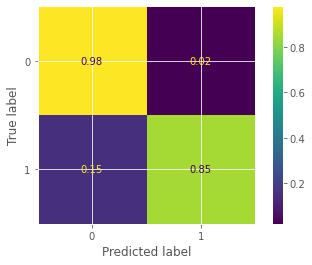

In [ ]:
#@title
svm_csa_model = model
plot_confusion_matrix(svm_csa_model, x_test, y_test, normalize='true')

In [ ]:
#@title
print(X)

     n_pregnant  glucose_conc    bp  skin_len  insulin   bmi  pedigree_fun  \
0             6         148.0  72.0      35.0    169.5  33.6         0.627   
1             1          85.0  66.0      29.0    102.5  26.6         0.351   
2             8         183.0  64.0      32.0    169.5  23.3         0.672   
3             1          89.0  66.0      23.0     94.0  28.1         0.167   
4             0         137.0  40.0      35.0    168.0  43.1         0.449   
..          ...           ...   ...       ...      ...   ...           ...   
763          10         101.0  76.0      27.0    180.0  32.9         0.171   
764           2         122.0  70.0      27.0    102.5  36.8         0.340   
765           5         121.0  72.0      23.0    112.0  26.2         0.245   
766           1         126.0  60.0      32.0    169.5  30.1         0.349   
767           1          93.0  70.0      31.0    102.5  30.4         0.315   

     age  
0     50  
1     31  
2     32  
3     21  
4     33

**HARMONIC SEARCH**

In [ ]:
#@title
from IPython.core.display import HTML
#HS
import random
swarm_size=10
max_iterations = 20
alpha = 0.1
a1=3
a2=3.5
beta=0.1
d=3
fl=3
l=0.95
g=1
delta=0.9
num_harmonies=10
max_HS = 30
r_accept = 0.8
r_pa = 0.3
b_range = 2
gmax=9.8
gmin=6
def transfer_func(velocity):
    t=[]
    for i in range(len(velocity)):
        t.append(abs(0.5-math.exp(velocity[i])/(1+(math.exp(velocity[i])))))
        #t.append(np.abs(velocity[j] / np.sqrt(1+ velocity[j]*velocity[j])))
    return t

def find_fitness(solution):
        model = svm.SVC(kernel='rbf', class_weight={0: solution[0], 1: solution[1]})
        model.fit(x_train, y_train)
        fitness = model.score(x_train,y_train)
        val = model.score(x_test, y_test)
        #print("HM: ", fitness, "test: ",val)
        return -fitness

def HS(HM,gbest,gbest_fitness,X,y,weights,seed):
    np.random.seed(seed)
    for i in range(max_iterations, num_harmonies):
        HM[i]=np.random.uniform(low=-20,high=20,size=weights)
    fitnesses=[]
    for i in range(num_harmonies):
            fitnesses.append(find_fitness(HM[i]))
    fitnesses = np.array(fitnesses)    
    HM = [solution for _, solution in sorted(zip(fitnesses, HM), key=lambda pair: pair[0])]
    #print(find_fitness(HM[0]))
    #print(HM)

    worst_fitness = np.max(fitnesses)
    for iter in range(max_HS):
        tmp = HM[0].copy()
        for i in range(weights):
            if np.random.random() < r_accept:
                choice = random.randint(0, num_harmonies-1)
                tmp[i] = HM[choice][i]
                if random.random() < r_pa:
                        tmp[i] += b_range * random.uniform(-1,1)
            else:
                tmp[i] = random.uniform(-1,1)
        cur_fitness = find_fitness(tmp) 
        if cur_fitness < worst_fitness:
            HM[num_harmonies-1] = tmp

            for i in range(num_harmonies):
                fitnesses[i] = find_fitness(HM[i])
            HM = [solution for _, solution in sorted(zip(fitnesses, HM), key=lambda pair: pair[0])]
            worst_fitness = np.max(fitnesses) 
        #print("HM\n",HM)
    if -find_fitness(HM[0])>gbest_fitness:
        gbest = HM[0].copy()
        #print("gbest weights: ", gbest)
        gbest_fitness = find_fitness(HM[0])
        #print("gbest... : ", gbest_fitness)
    return (gbest,-gbest_fitness)

**CSA WITH HARMONIC SEARCH**

ACCURACY: 95.5%

CSA-SEED: 22
 HS-SEED: 5

In [ ]:
#@title
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import math

def crow_search_algorithm(X, y, max_iterations, population_size, a, b, seed, hs_seed):
    np.random.seed(seed)
    # Initialize the population of solutions
    solutions = []
    gbest = 0
    for i in range(population_size):
        solutions.append(np.random.uniform(-2, 2, size=X.shape[1]))
    
    # Iterate over the maximum number of iterations
    for i in range(max_iterations):
        # Calculate the fitness of each solution
        fitness = []
        for solution in solutions:
            model = svm.SVC(kernel='rbf', class_weight={0: solution[0], 1: solution[1]})
            model.fit(X, y)
            accuracy = model.score(X, y)
            test = model.score(x_test, y_test)
            #print(f"iter: {i} accuracy: {accuracy}, test: {test}")
            fitness.append(accuracy)
        
        # Sort the solutions based on their fitness
        solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
        
        # Update the best solution
        best_solution = solutions[-1]
        gbest = fitness[-1]
        # Update the solutions using the Crow Search Algorithm formula
        for j in range(population_size):
            solution = solutions[j]
            r = np.random.uniform(0, 1)
            if r < a:
                k = np.random.uniform(-1, 1)
                # Exploit the best solution
              
                solution = best_solution + b*(best_solution - solution)+k
            else:
                # Explore the solution space
                solution = np.random.uniform(-2, 2, size=X.shape[1])
            solutions[j] = solution
    
    # Return the best solution
    solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
    #print("l", len(solutions[0]))
    (best_solution,gbest_fitness)=HS(solutions,best_solution,gbest,X,y,8,hs_seed)
    # print("best_solution: ", best_solution)
    # print("ob: ", gbest_fitness)
    return best_solution

# Optimize the SVM model weights using the Crow Search Algorithm
for s in range(1):
  best_weights = crow_search_algorithm(x_train, y_train, max_iterations=15, population_size=10, a=0.1, b=2.2, seed =22, hs_seed = 5)
  # Create the optimized SVM model
  model = svm.SVC(kernel='rbf', class_weight={0: best_weights[0], 1: best_weights[1]})
  # Train the model on the training data
  model.fit(x_train, y_train)
  # Test the model on the test data
  accuracy = model.score(x_test, y_test)
  # Print the accuracy of the model
  print(f's: {s} Accuracy: {accuracy:.3f}')
  #find_fitness(best_weights)

s: 0 Accuracy: 0.955


[31.47892854 24.82560261 -9.93211775  0.89968325 11.17198156 -0.71961096
 -0.06184184 -0.99652074]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


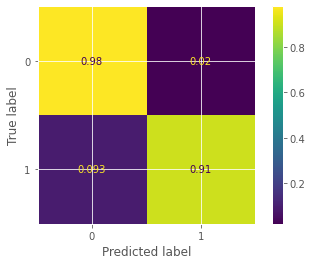

In [ ]:
#@title
csa_hs_model = model
print(best_weights)
plot_confusion_matrix(csa_hs_model, x_test, y_test, normalize='true')

**SVM WITH CSA-BESO FOR CLASSIFICATION**

ACCURACY: 92.2, seed:25

In [ ]:
#@title
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import math

# Define the Crow Search Algorithm function
def crow_search_algorithm(X, y, max_iterations, population_size, a, b, seed):
    np.random.seed(seed)
    # Initialize the population of solutions
    r = 2
    solutions = []
    for i in range(population_size):
        solutions.append(np.random.uniform(-2, 2, size=X.shape[1]))
    #sum_solutions = solutions.copy()
    # Iterate over the maximum number of iterations
    for i in range(max_iterations):
        # Calculate the fitness of each solution
        fitness = []
        for solution in solutions:
            model = svm.SVC(kernel='rbf', class_weight={0: solution[0], 1: solution[1]})
            model.fit(X, y)
            accuracy = model.score(X, y)
            test = model.score(x_test, y_test)
            #print("iter: ",i,"accuracy: ", accuracy,"test: ",test)
            fitness.append(accuracy)
        # if i>0:
        #   sum_solutions += solutions[-1]
        # # Sort the solutions based on their fitness
        solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
        # Update the best solution
        best_solution = solutions[-1]
        # Update the solutions using the Crow Search Algorithm formula
        for j in range(population_size):
            solution = solutions[j]
            random_crow = np.random.randint(population_size)
            r = np.random.uniform(0, 1)
            if r < a:
                k = np.random.uniform(-1, 1)
                # Exploit the best solution
                #solution = best_solution + b*(best_solution - solution)+k
                rand = np.random.uniform(-1, 1)
                theta_i = 2*math.pi*rand
                r_i = theta_i+4*rand
                xr_i = r_i*math.sin(theta_i)
                yr_i = r_i*math.cos(theta_i)
                #print("ss".sum_solutions)
                #mean_solution = sum_solutions
                solution = best_solution + yr_i*(best_solution - solution)+xr_i*(solutions[random_crow] - solution)

            else:
                # Explore the solution space
                solution = np.random.uniform(-1, 1, size=X.shape[1])
            solutions[j] = solution
        b = b*6*math.sin(math.pi*b)
    # Return the best solution
    return best_solution

# Load the Pima Indian Diabetes dataset
# df = pd.read_csv('https://raw.githubusercontent.com/sheetalbongale/Diabetes-Detection-Using-Deep-Learning/main/data/pima-indians-diabetes.csv')

# # Split the data into features and target
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for r in range(1):
#   # Split the data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

for s in range(50):
  best_weights = crow_search_algorithm(x_train, y_train, max_iterations=20, population_size=10, a=0.1, b=2.2, seed = s)
  # Create the optimized SVM model
  model = svm.SVC(kernel='rbf', class_weight={0: best_weights[0], 1: best_weights[1]})
  # Train the model on the training data
  model.fit(x_train, y_train)
  # Test the model on the test data
  accuracy = model.score(x_test, y_test)
  # Print the accuracy of the model
  print(f's: {s} Accuracy: {accuracy:.3f}')


s: 0 Accuracy: 0.877
s: 1 Accuracy: 0.890
s: 2 Accuracy: 0.695
s: 3 Accuracy: 0.883
s: 4 Accuracy: 0.883
s: 5 Accuracy: 0.877
s: 6 Accuracy: 0.864
s: 7 Accuracy: 0.909
s: 8 Accuracy: 0.903
s: 9 Accuracy: 0.903
s: 10 Accuracy: 0.896
s: 11 Accuracy: 0.896
s: 12 Accuracy: 0.890
s: 13 Accuracy: 0.805
s: 14 Accuracy: 0.903
s: 15 Accuracy: 0.851
s: 16 Accuracy: 0.870
s: 17 Accuracy: 0.877
s: 18 Accuracy: 0.851
s: 19 Accuracy: 0.695
s: 20 Accuracy: 0.896
s: 21 Accuracy: 0.916
s: 22 Accuracy: 0.903
s: 23 Accuracy: 0.896
s: 24 Accuracy: 0.857
s: 25 Accuracy: 0.922
s: 26 Accuracy: 0.857
s: 27 Accuracy: 0.903
s: 28 Accuracy: 0.896


KeyboardInterrupt: ignored

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


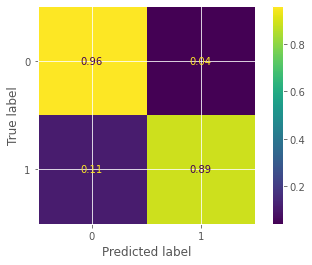

In [ ]:
#@title
svm_csa_beso_model = model
plot_confusion_matrix(svm_csa_beso_model, x_test, y_test, normalize='true')

**RANDOM FOREST RFE FEATURE SELECTION**

In [ ]:
# Load libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

clf = RandomForestClassifier(random_state=28)

# Create the RFE model and select 3 attributes
rfe = RFE(clf)
rfe = rfe.fit(X,y)

# Print the feature ranking
print(X.columns)
print(rfe.ranking_)
print(X.columns[rfe.support_])
X_selected = X[X.columns[rfe.support_]]
print(X_selected)

Index(['n_pregnant', 'glucose_conc', 'bp', 'skin_len', 'insulin', 'bmi',
       'pedigree_fun', 'age'],
      dtype='object')
[4 1 5 1 1 2 3 1]
Index(['glucose_conc', 'skin_len', 'insulin', 'age'], dtype='object')
     glucose_conc  skin_len  insulin  age
0           148.0      35.0    169.5   50
1            85.0      29.0    102.5   31
2           183.0      32.0    169.5   32
3            89.0      23.0     94.0   21
4           137.0      35.0    168.0   33
..            ...       ...      ...  ...
763         101.0      27.0    180.0   27
764         122.0      27.0    102.5   27
765         121.0      23.0    112.0   30
766         126.0      32.0    169.5   47
767          93.0      31.0    102.5   23

[768 rows x 4 columns]


**SA FEATURE SELECTION**

In [ ]:
def evaluate_solution(solution, X, y):
    # Select the features based on the glow worms' positions
    print("s: ",solution)
    X_sel = X[X.columns[solution]]
    if(X_sel.shape[1]==0):
      return 0
    x_train,x_test,y_train,y_test=train_test_split(X_sel,y,test_size=0.2,random_state=95)
    print(x_train.shape[1])
    model=SVC(kernel='rbf')
    model.fit(x_train,y_train)
    accuracy = model.score(x_train, y_train)
    # Print the accuracy of the model
    print(f'selected features: {solution} Accuracy: {accuracy:.3f}')
    return accuracy
    import numpy as np

def simulated_annealing(X, y, max_iterations=1000, temperature=1000, cooling_rate=0.99):
    # Initialize the solution with all features included
    solution = np.ones(X.shape[1], dtype=bool)
    # Initialize the best solution found so far
    best_solution = solution
    # Initialize the quality of the best solution found so far
    best_quality = evaluate_solution(solution, X, y)
    # Initialize the current quality
    current_quality = best_quality
    
    for i in range(max_iterations):
        # Choose a random feature to flip
        idx = np.random.randint(X.shape[1])
        
        # Flip the feature
        new_solution = solution.copy()
        new_solution[idx] = not new_solution[idx]
        
        # Evaluate the new solution
        new_quality = evaluate_solution(new_solution, X, y)
        
        # Calculate the acceptance probability
        acceptance_probability = np.exp((new_quality - current_quality) / temperature)
        
        # Decide whether to accept the new solution
        if acceptance_probability > np.random.rand():
            solution = new_solution
            current_quality = new_quality
        
        # Update the best solution if necessary
        if new_quality > best_quality:
            best_solution = new_solution
            best_quality = new_quality
        
        # Cool the temperature
        temperature *= cooling_rate
    
    return best_solution

sol = simulated_annealing(X, y)
print("solution: ", sol)

s:  [ True  True  True  True  True  True  True  True]
8
selected features: [ True  True  True  True  True  True  True  True] Accuracy: 0.847
s:  [ True  True False  True  True  True  True  True]
7
selected features: [ True  True False  True  True  True  True  True] Accuracy: 0.844
s:  [ True  True False  True  True  True  True False]
6
selected features: [ True  True False  True  True  True  True False] Accuracy: 0.834
s:  [ True  True False  True  True  True False False]
5
selected features: [ True  True False  True  True  True False False] Accuracy: 0.837
s:  [ True  True False  True False  True False False]
4
selected features: [ True  True False  True False  True False False] Accuracy: 0.767
s:  [False  True False  True False  True False False]
3
selected features: [False  True False  True False  True False False] Accuracy: 0.774
s:  [False  True False  True False  True False  True]
4
selected features: [False  True False  True False  True False  True] Accuracy: 0.780
s:  [False  T

In [ ]:
X_selected = X[X.columns[sol]]
print(X_selected)

     glucose_conc  skin_len  insulin  age
0           148.0      35.0    169.5   50
1            85.0      29.0    102.5   31
2           183.0      32.0    169.5   32
3            89.0      23.0     94.0   21
4           137.0      35.0    168.0   33
..            ...       ...      ...  ...
763         101.0      27.0    180.0   27
764         122.0      27.0    102.5   27
765         121.0      23.0    112.0   30
766         126.0      32.0    169.5   47
767          93.0      31.0    102.5   23

[768 rows x 4 columns]


**SVM CLASSIFICATION SELECTED FEATURES**

ACCURACY: 84.44%

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=8)
# std = StandardScaler()
# x_train = std.fit_transform(x_train)
# x_test = std.transform(x_test)
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8441558441558441

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


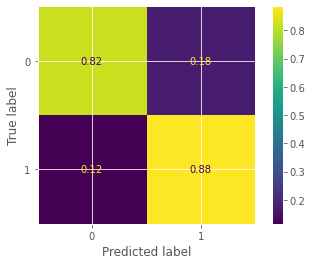

In [ ]:
plot_confusion_matrix(model, x_test, y_test, normalize='true')

**SVM-CSA CLASSIFICATION**

Accuracy: 89.0%

Seed: 10

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import math

def crow_search_algorithm(X, y, max_iterations, population_size, a, b, seed):
    np.random.seed(seed)
    # Initialize the population of solutions
    solutions = []
    for i in range(population_size):
        solutions.append(np.random.uniform(-20, 20, size=X.shape[1]))
    
    # Iterate over the maximum number of iterations
    for i in range(max_iterations):
        # Calculate the fitness of each solution
        fitness = []
        for solution in solutions:
            model = svm.SVC(kernel='rbf', class_weight={0: solution[0], 1: solution[1]})
            model.fit(X, y)
            accuracy = model.score(X, y)
            test = model.score(x_test, y_test)
            #print(f"iter: {i} accuracy: {accuracy}, test: {test}")
            fitness.append(accuracy)
        
        # Sort the solutions based on their fitness
        solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
        
        # Update the best solution
        best_solution = solutions[-1]
        
        # Update the solutions using the Crow Search Algorithm formula
        for j in range(population_size):
            solution = solutions[j]
            r = np.random.uniform(0, 1)
            if r < a:
                k = np.random.uniform(-1, 1)
                # Exploit the best solution
              
                solution = best_solution + b*(best_solution - solution)+k
            else:
                # Explore the solution space
                solution = np.random.uniform(-20, 20, size=X.shape[1])
            solutions[j] = solution
    
    # Return the best solution
    return best_solution

# Load the Pima Indian Diabetes dataset
# df = pd.read_csv('https://raw.githubusercontent.com/sheetalbongale/Diabetes-Detection-Using-Deep-Learning/main/data/pima-indians-diabetes.csv')

# # Split the data into features and target
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for r in range(1):
#   # Split the data into training and test sets

for s in range(1):
  best_weights = crow_search_algorithm(x_train, y_train, max_iterations=20, population_size=10, a=0.1, b=0.9, seed =10)
  # Create the optimized SVM model
  model = svm.SVC(kernel='rbf', class_weight={0: best_weights[0], 1: best_weights[1]})
  # Train the model on the training data
  model.fit(x_train, y_train)
  # Test the model on the test data
  accuracy = model.score(x_test, y_test)
  # Print the accuracy of the model
  print(f's: {s} Accuracy: {accuracy:.3f}')


s: 0 Accuracy: 0.890


[28.2772501  20.16660614 23.49592444 19.58911293]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


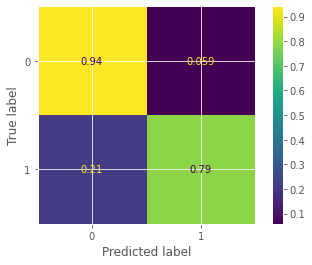

In [ ]:
print(best_weights)
csa_fe_model = model
plot_confusion_matrix(csa_fe_model, x_test, y_test, normalize='true')

In [ ]:
#@title
X_train = X_selected
Y_train = y

**CSA WITH HARMONIC SEARCH AFTER FEATURE SELECTION**


ACCURACY: 96.1%

SEED: 5


In [ ]:
from IPython.core.display import HTML
#HS
import random
import math
swarm_size=10
max_iterations = 20
alpha = 0.1
a1=3
a2=3.5
beta=0.1
d=3
fl=3
l=2.1
g=1
delta=0.9
num_harmonies=10
max_HS = 40
r_accept = 0.8
r_pa = 0.3
b_range = 2
gmax=9.8
gmin=6
def transfer_func(velocity):
    t=[]
    for i in range(len(velocity)):
        t.append(abs(0.5-math.exp(velocity[i])/(1+(math.exp(velocity[i])))))
        #t.append(np.abs(velocity[j] / np.sqrt(1+ velocity[j]*velocity[j])))
    return t

def find_fitness(solution):
        model = svm.SVC(kernel='rbf', class_weight={0: solution[0], 1: solution[1]})
        model.fit(x_train, y_train)
        fitness = model.score(x_train,y_train)
        val = model.score(x_test, y_test)
        #print("HM: ", fitness, "test: ",val)
        return -fitness

def HS(HM,gbest,gbest_fitness,X,y,weights,seed):
    np.random.seed(seed)
    for i in range(max_iterations, num_harmonies):
        HM[i]=np.random.uniform(low=-50,high=50,size=weights)
    fitnesses=[]
    for i in range(num_harmonies):
            fitnesses.append(find_fitness(HM[i]))
    fitnesses = np.array(fitnesses)    
    HM = [solution for _, solution in sorted(zip(fitnesses, HM), key=lambda pair: pair[0])]
    #print(find_fitness(HM[0]))
    #print(HM)

    worst_fitness = np.max(fitnesses)
    for iter in range(max_HS):
        tmp = HM[0].copy()
        for i in range(weights):
            if np.random.random() < r_accept:
                choice = random.randint(0, num_harmonies-1)
                tmp[i] = HM[choice][i]
                if random.random() < r_pa:
                        tmp[i] += b_range * pow(l,4)*math.sin(2*math.pi*l)
                        #tmp[i] += b_range * math.sin(l)*math.cos(2*math.pi*l)
            else:
                tmp[i] = random.uniform(-2,2)
        cur_fitness = find_fitness(tmp) 
        if cur_fitness < worst_fitness:
            HM[num_harmonies-1] = tmp

            for i in range(num_harmonies):
                fitnesses[i] = find_fitness(HM[i])
            HM = [solution for _, solution in sorted(zip(fitnesses, HM), key=lambda pair: pair[0])]
            worst_fitness = np.max(fitnesses) 
        #print("HM\n",HM)
    if -find_fitness(HM[0])>gbest_fitness:
        gbest = HM[0].copy()
        #print("gbest weights: ", gbest)
        gbest_fitness = find_fitness(HM[0])
        #print("gbest... : ", gbest_fitness)
    return (gbest,-gbest_fitness)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import math

w = 10
wmax = w
prob_mutation = 0.1
def crow_search_algorithm(X, y, max_iterations, population_size, a, b, seed, hs_seed,n_feat):
    np.random.seed(seed)
    # Initialize the population of solutions
    solutions = []
    gbest = 0
    for i in range(population_size):
        solutions.append(np.random.uniform(-2, 2, size=X.shape[1]))
    
    # Iterate over the maximum number of iterations
    for i in range(max_iterations):
        # Calculate the fitness of each solution
        w = wmax*math.exp(-pow(i,2)/pow(2*(max_iterations/1600),2))
        fitness = []
        for solution in solutions:
            model = svm.SVC(kernel='rbf', class_weight={0: solution[0], 1: solution[1]})
            model.fit(X, y)
            accuracy = model.score(X, y)
            test = model.score(x_test, y_test)
            #print(f"iter: {i} accuracy: {accuracy}, test: {test}")
            fitness.append(accuracy)
        
        # Sort the solutions based on their fitness
        solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
        f = sorted(fitness)
        # Update the best solution
        best_solution = solutions[-1]
        gbest = f[-1]
        # Update the solutions using the Crow Search Algorithm formula
        for j in range(population_size):
            solution = solutions[j]
            r = np.random.uniform(0, 1)
            if r < a:
                k = np.random.uniform(-1, 1)
                # Exploit the best solution
              
                solution = best_solution + b*(best_solution - solution)
            else:
                # Explore the solution space
                solution = w*solution + np.random.uniform(-2, 2, size=X.shape[1])
            
            r2 = np.random.uniform(0,1)
            if r2 >=prob_mutation:
              solution = solution+np.random.uniform(0,1)
            
            else:
              solution = solution*random.gauss(0, 1)

            solutions[j] = solution
    
    # Return the best solution
    print("before: ", gbest)
    solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
    #print("l", len(solutions[0]))
    (best_solution,gbest_fitness)=HS(solutions,best_solution,gbest,X,y,n_feat, hs_seed)
    print("after: ", gbest_fitness)
    return best_solution

x_train,x_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=95)

# Optimize the SVM model weights using the Crow Search Algorithm
models = []
for s in range(1):

  best_weights = crow_search_algorithm(x_train, y_train, max_iterations=20, population_size=10, a=0.1, b=10, seed=5,hs_seed =0, n_feat=4)
  # Create the optimized SVM model
  model = svm.SVC(kernel='rbf', class_weight={0: best_weights[0], 1: best_weights[1]})
  # Train the model on the training data
  model.fit(x_train, y_train)
  # Test the model on the test data
  accuracy = model.score(x_test, y_test)
  # Print the accuracy of the model
  print(f's: {s} Accuracy: {accuracy:.3f}')
  #models.append(model)
  #find_fitness(best_weights)


before:  0.8534201954397395
after:  0.8859934853420195
s: 0 Accuracy: 0.961


In [ ]:
print(best_weights)##96.1 accuracy

[23.91653351 18.15879894  3.37607391 -5.65504578]


[23.91653351 18.15879894  3.37607391 -5.65504578]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


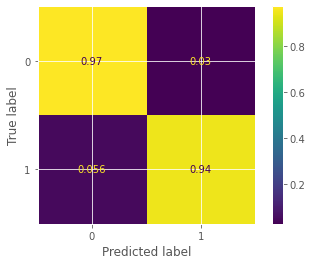

In [ ]:
## ACCURACY 96.1 -- WEIGHTS
svm_csa_hs = model
print(best_weights)
plot_confusion_matrix(model, x_test, y_test, normalize='true')

**SVM-CSA-BESO CLASSIFICATION**

ACCURACY: 0.95

SEED: 48




In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import math

# Define the Crow Search Algorithm function
def crow_search_algorithm(X, y, max_iterations, population_size, a, b,seed):
    np.random.seed(seed)
    # Initialize the population of solutions
    r = 2
    solutions = []
    for i in range(population_size):
        solutions.append(np.random.uniform(-2, 2, size=X.shape[1]))
    #sum_solutions = solutions.copy()
    # Iterate over the maximum number of iterations
    for i in range(max_iterations):
        # Calculate the fitness of each solution
        fitness = []
        for solution in solutions:
            model = svm.SVC(kernel='rbf', class_weight={0: solution[0], 1: solution[1]})
            model.fit(X, y)
            accuracy = model.score(X, y)
            test = model.score(x_test, y_test)
            #print("iter: ",i,"accuracy: ", accuracy,"test: ",test)
            fitness.append(accuracy)
        # if i>0:
        #   sum_solutions += solutions[-1]
        # # Sort the solutions based on their fitness
        solutions = [solution for _, solution in sorted(zip(fitness, solutions), key=lambda pair: pair[0])]
        # Update the best solution
        best_solution = solutions[-1]
        # Update the solutions using the Crow Search Algorithm formula
        for j in range(population_size):
            solution = solutions[j]
            random_crow = np.random.randint(population_size)
            r = np.random.uniform(0, 1)
            if r < a:
                k = np.random.uniform(-1, 1)
                # Exploit the best solution
                #solution = best_solution + b*(best_solution - solution)+k
                rand = np.random.uniform(-1, 1)
                theta_i = 2*math.pi*rand
                r_i = theta_i+4*rand
                xr_i = r_i*math.sin(theta_i)
                yr_i = r_i*math.cos(theta_i)
                #print("ss".sum_solutions)
                #mean_solution = sum_solutions
                solution = best_solution + yr_i*(best_solution - solution)+xr_i*(best_solution - solution)

            else:
                # Explore the solution space
                solution = np.random.uniform(-3, 3, size=X.shape[1])
            solutions[j] = solution
       # b = b*2*math.sin(math.pi*b)
    # Return the best solution
    return best_solution

# Load the Pima Indian Diabetes dataset
# df = pd.read_csv('https://raw.githubusercontent.com/sheetalbongale/Diabetes-Detection-Using-Deep-Learning/main/data/pima-indians-diabetes.csv')

# # Split the data into features and target
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for r in range(1):
#   # Split the data into training and test sets

x_train,x_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=8)

for s in range(50):
  if s==0:
    s+=1
  best_weights = crow_search_algorithm(x_train, y_train, max_iterations=20, population_size=10, a=0.1, b=0.8, seed = s)
  # Create the optimized SVM model
  model = svm.SVC(kernel='rbf', class_weight={0: best_weights[0], 1: best_weights[1]})
  # Train the model on the training data
  model.fit(x_train, y_train)
  # Test the model on the test data
  accuracy = model.score(x_test, y_test)
  # Print the accuracy of the model
  print(f's: {s} Accuracy: {accuracy:.3f}')


s: 1 Accuracy: 0.857
s: 1 Accuracy: 0.857
s: 2 Accuracy: 0.740
s: 3 Accuracy: 0.844
s: 4 Accuracy: 0.844
s: 5 Accuracy: 0.831
s: 6 Accuracy: 0.844
s: 7 Accuracy: 0.870
s: 8 Accuracy: 0.721
s: 9 Accuracy: 0.890
s: 10 Accuracy: 0.844
s: 11 Accuracy: 0.831
s: 12 Accuracy: 0.812
s: 13 Accuracy: 0.890
s: 14 Accuracy: 0.844
s: 15 Accuracy: 0.799
s: 16 Accuracy: 0.844
s: 17 Accuracy: 0.844
s: 18 Accuracy: 0.857
s: 19 Accuracy: 0.831
s: 20 Accuracy: 0.818


KeyboardInterrupt: ignored

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


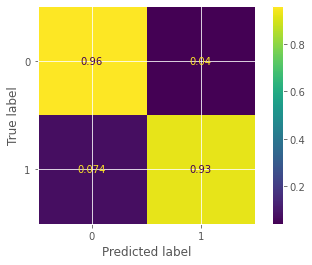

In [ ]:
plot_curves(svm_csa_beso,X_selected,y)

## SVM With Linear Kernel

In [ ]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8961038961038961

In [ ]:
confusion_matrix(y_test,y_pred)

array([[96, 11],
       [ 5, 42]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       107
           1       0.79      0.89      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.90      0.88       154
weighted avg       0.90      0.90      0.90       154



ROC AUC: 0.90


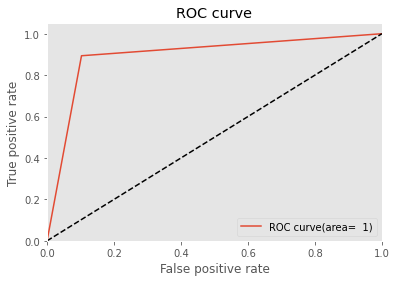

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Artificial Neural Networks

In [ ]:
model = Sequential()
model.add(Dense(32,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [ ]:
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                160       
                                                                 
 activation_8 (Activation)   (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 activation_10 (Activation)  (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 128)              